In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
yelp_rev= pd.read_parquet('review.parquet')
yelp_bus=pd.read_parquet('business.parquet')

In [3]:
ca_hotels= pd.read_parquet('ca_hotels.parquet')
fl_hotels= pd.read_parquet('fl_hotels.parquet')
ny_hotels= pd.read_parquet('ny_hotels.parquet')
nv_hotels= pd.read_parquet('nv_hotels.parquet')
tx_hotels= pd.read_parquet('tx_hotels.parquet')

In [4]:
yelp_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82925 entries, 0 to 82924
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    82925 non-null  object 
 1   name           82925 non-null  object 
 2   city           82925 non-null  object 
 3   state          82925 non-null  object 
 4   latitude       82925 non-null  float64
 5   longitude      82925 non-null  float64
 6   categories     82925 non-null  object 
 7   review_id      82925 non-null  object 
 8   user_id        82925 non-null  object 
 9   stars          82925 non-null  float64
 10  date           82925 non-null  object 
 11  sent_analysis  82925 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 7.6+ MB


In [5]:
yelp_rev.head()

,business_id,name,city,state,latitude,longitude,categories,review_id,user_id,stars,date,sent_analysis
0,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra...",Bj6g6pCM5dBBlNO2EwRP6w,NePHFwSt7Hvuc9tbQ6S-aQ,5.0,2014-08-21 14:12:08,2
1,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra...",uzJfKuY4kNjpIHQJLHg8Gg,eLuM7MT4twNmdAPF8Xxi7Q,5.0,2020-06-01 15:11:31,2
2,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra...",CSy6BEXqqr-hJfwrUhK3dQ,yFFa4AIe7zM3o9pEzVIB2Q,1.0,2016-07-25 02:50:46,0
3,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra...",FQnqH3UDL01DhFPV03ADPw,VCxY2F6Q4ADlaRLTD3m6rA,5.0,2019-05-06 20:57:24,2
4,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra...",a5u1u1Or4-qmhEQYKzgLZQ,udmsyG7J4Hgl954xVL1hjQ,5.0,2021-10-26 21:09:44,2


In [12]:
columns_to_count = ['categories']

for column in columns_to_count:
    counts = yelp_rev[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'categories':
categories
Hotels & Travel, Event Planning & Services, Hotels                                                           3790
Hotels, Event Planning & Services, Hotels & Travel                                                           3728
Hotels & Travel, Hotels, Event Planning & Services                                                           2862
Event Planning & Services, Hotels, Hotels & Travel                                                           2847
Event Planning & Services, Hotels & Travel, Hotels                                                           2809
                                                                                                             ... 
Jewelry, Shopping, Hotels & Travel, Travel Services                                                             5
Hotels & Travel, Financial Services, Travel Services, Roadside Assistance, Automotive, Insurance                5
Party Bus Rentals, Event Planning & Services,

In [8]:
yelp_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  1536 non-null   object 
 1   name         1536 non-null   object 
 2   city         1536 non-null   object 
 3   state        1536 non-null   object 
 4   latitude     1536 non-null   float64
 5   longitude    1536 non-null   float64
 6   categories   1536 non-null   object 
dtypes: float64(2), object(5)
memory usage: 84.1+ KB


In [10]:
yelp_bus.head()

,business_id,name,city,state,latitude,longitude,categories
0,-aeZuatjCDMV1X4gCTz9Ug,David Thomas Trailways,Philadelphia,FL,40.106409,-74.973937,"Buses, Transportation, Bus Tours, Hotels & Tra..."
1,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,Nashville,NV,36.211592,-86.694319,"Venues & Event Spaces, Performing Arts, Arts &..."
2,MyE_zdul_JO-dOHOug4GQQ,Watson Adventures Scavenger Hunts,Philadelphia,FL,40.119713,-75.009710,"Local Flavor, Team Building Activities, Active..."
3,vjLSYNGFkPu4Y5HKoJlzYg,Rancho 777,Reno,FL,39.532347,-119.804255,"Event Planning & Services, Hotels, Hotels & Tr..."
4,1tLrjXG-I9hkOoZxlbwDqw,Olde Black Horse,Norristown,NV,40.108381,-75.318943,"American (Traditional), Bars, Breakfast & Brun..."


In [11]:
columns_to_count = ['categories']

for column in columns_to_count:
    counts = yelp_bus[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'categories':
categories
Hotels & Travel, Event Planning & Services, Hotels                                                                                                                     84
Hotels, Event Planning & Services, Hotels & Travel                                                                                                                     78
Event Planning & Services, Hotels, Hotels & Travel                                                                                                                     72
Event Planning & Services, Hotels & Travel, Hotels                                                                                                                     71
Hotels, Hotels & Travel, Event Planning & Services                                                                                                                     69
                                                                                                           

In [15]:
ca_hotels['state'] = 'California'
fl_hotels['state'] = 'Florida'
ny_hotels['state'] = 'New York'
nv_hotels['state'] = 'Nevada'
tx_hotels['state'] = 'Texas'

In [17]:
df_states = pd.concat([ca_hotels, fl_hotels, ny_hotels, tx_hotels, nv_hotels], axis=0,join='inner')



In [18]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28183 entries, 0 to 3906
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         28183 non-null  float64       
 1   time            28183 non-null  datetime64[ns]
 2   rating          28183 non-null  int64         
 3   text            17032 non-null  object        
 4   business name   28183 non-null  object        
 5   address         28148 non-null  object        
 6   description     8042 non-null   object        
 7   latitude        28183 non-null  float64       
 8   longitude       28183 non-null  float64       
 9   category        28183 non-null  object        
 10  avg_rating      28183 non-null  float64       
 11  num_of_reviews  28183 non-null  int64         
 12  price           28183 non-null  object        
 13  state           28183 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory

In [19]:
df_states.to_parquet('df_states.parquet', index=False)

## EDA

In [ ]:
df_states= pd.read_parquet('df_states.parquet')

In [21]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28183 entries, 0 to 3906
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         28183 non-null  float64       
 1   time            28183 non-null  datetime64[ns]
 2   rating          28183 non-null  int64         
 3   text            17032 non-null  object        
 4   business name   28183 non-null  object        
 5   address         28148 non-null  object        
 6   description     8042 non-null   object        
 7   latitude        28183 non-null  float64       
 8   longitude       28183 non-null  float64       
 9   category        28183 non-null  object        
 10  avg_rating      28183 non-null  float64       
 11  num_of_reviews  28183 non-null  int64         
 12  price           28183 non-null  object        
 13  state           28183 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory

### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [23]:
conteo_gmap_id = df_states['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

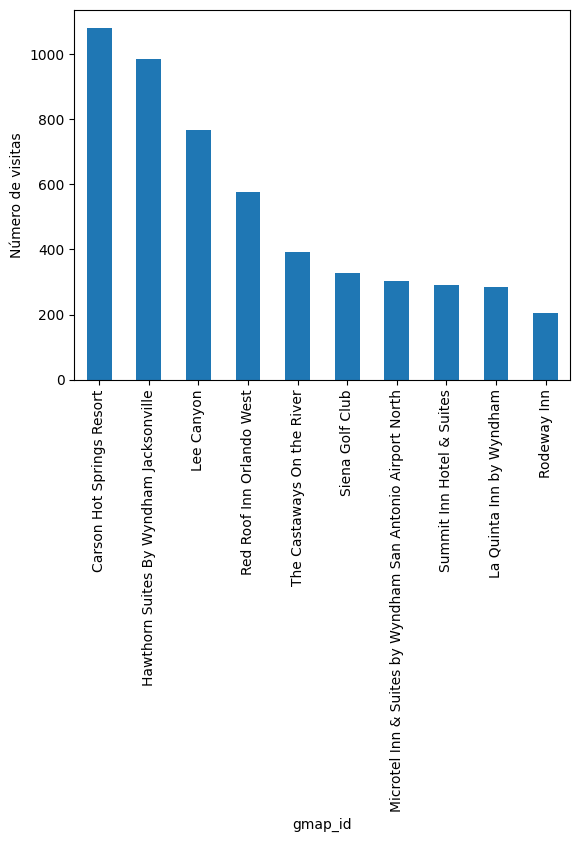

In [24]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('gmap_id')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

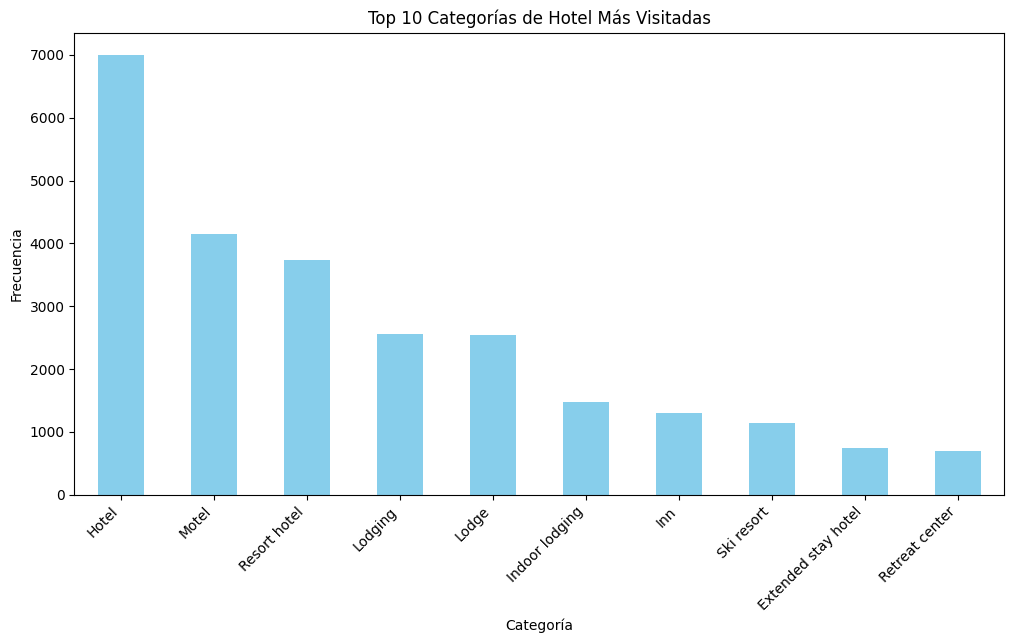

In [25]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = df_states['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

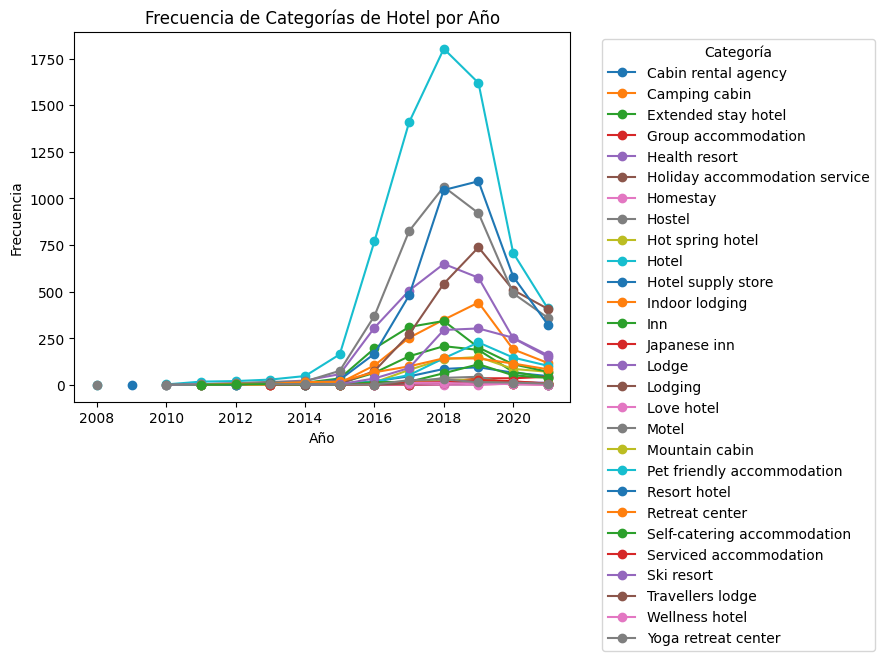

In [26]:


# Agruparmos por año y contar la frecuencia de cada categoría
grouped_by_year = df_states.groupby([df_states['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

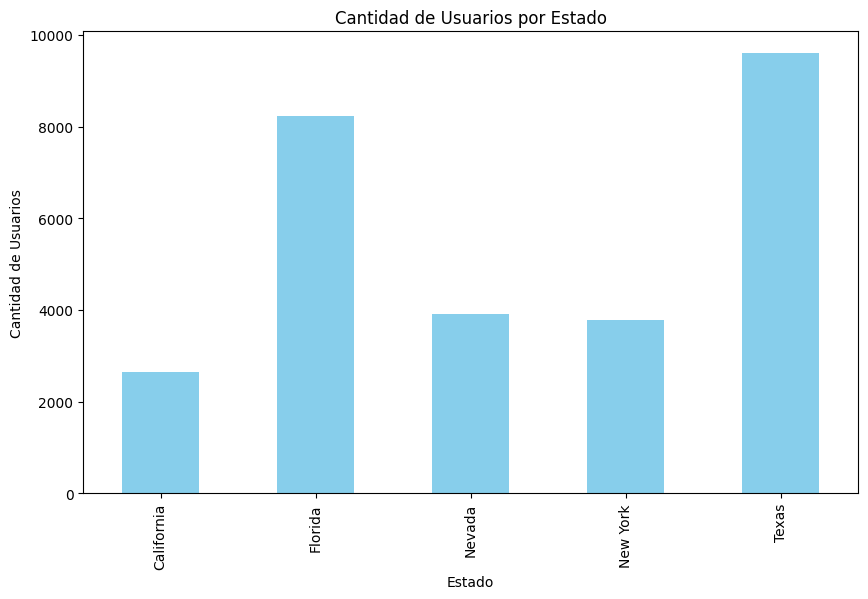

In [27]:
users_by_state = df_states.groupby('state')['user_id'].count()

# Crear el histograma
plt.figure(figsize=(10, 6))
users_by_state.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Usuarios por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Usuarios')
plt.show()

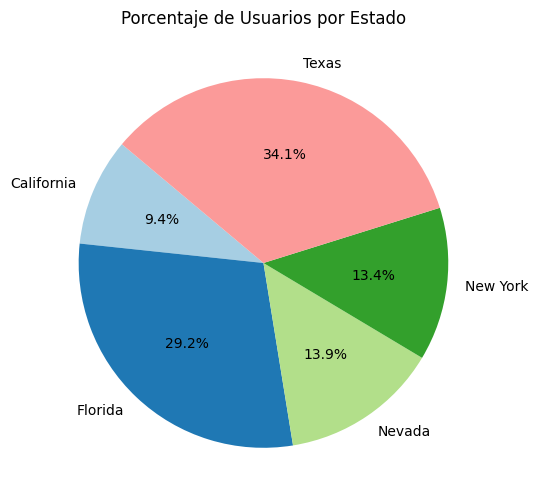

In [28]:
users_by_state = df_states.groupby('state')['user_id'].count()

# Crear el diagrama circular
plt.figure(figsize=(10, 6))
plt.pie(users_by_state, labels=users_by_state.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Porcentaje de Usuarios por Estado')
plt.show()

In [29]:

import plotly.express as px

# Supongamos que tu DataFrame se llama df_states

# Filtrar solo los registros con información de ubicación
df_locations = df_states.dropna(subset=['latitude', 'longitude'])

# Crear un mapa interactivo
fig = px.scatter_mapbox(df_locations, 
                        lat='latitude', 
                        lon='longitude', 
                        color='state',
                        hover_name='business name',
                        mapbox_style='carto-positron',
                        title='Distribución Geográfica de Negocios en California')

fig.show()